In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib, time, string, re
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [2]:
# Note:
# The City of Madison states that the data in the incident reports are not necessarily reflective of 
#    total crime statistics, but instead are chosen by the Officer in Charge's discretion of
#     what cases may have public interest.

df = pd.read_csv("incident_data.csv") # change to cleaned

In [3]:
# First, Let us take a quick look at our dataset!
df.head()

,date,incident,address,officer,casenumber,updated,link,description
0,11/14/2022,Damaged Property,400 block S. Midvale Blvd.,P.O. Hunter Lisko,2022-464356,NaN,https://www.cityofmadison.com/police/newsroom/...,"On Sunday afternoon, Madison Police officers r..."
1,11/09/2022,Fraud,211 S. Carroll St.,P.O. Hunter Lisko,2022-000000,NaN,https://www.cityofmadison.com/police/newsroom/...,"Recently, there has been an uptick in scams ta..."
2,11/09/2022,Traffic Incident,Beltline/S. Midvale Blvd.,P.O. Hunter Lisko,2022-457354,NaN,https://www.cityofmadison.com/police/newsroom/...,Yesterday afternoon at approximately 2:00 p.m....
3,11/08/2022,Traffic Incident,900 block E. Washington Ave.,P.O. Hunter Lisko,2022-277138,NaN,https://www.cityofmadison.com/police/newsroom/...,As part of the Madison Police Department's com...
4,11/03/2022,Missing Adult,West Side,Livia Novitzke,2022-446354,11/07/2022,https://www.cityofmadison.com/police/newsroom/...,Missing is a Theodore (TJ) Weege. TJ is a whit...


In [4]:
# All Columns of the Data
df.columns

Index(['date', 'incident', 'address', 'officer', 'casenumber', 'updated',
       'link', 'description'],
      dtype='object')

In [5]:
# Checking values of fifth entry
df.iloc[4] 

date                                                  11/03/2022
incident                                           Missing Adult
address                                                West Side
officer                                           Livia Novitzke
casenumber                                           2022-446354
updated                                               11/07/2022
link           https://www.cityofmadison.com/police/newsroom/...
description    Missing is a Theodore (TJ) Weege. TJ is a whit...
Name: 4, dtype: object

In [6]:
# Checking all types of Incidents reported
df["incident"].unique()

array(['Damaged Property', 'Fraud', 'Traffic Incident', 'Missing Adult',
       'Robbery', 'Weapons Violation', 'Murder/Homicide', 'Disturbance',
       'Information', 'Intoxicated/Impaired Driver', 'Arrested Person',
       'Residential Burglary', 'Suspicious Person', 'Theft', 'Battery',
       'Sexual Assault', 'Check Person', 'Drug Investigation',
       'Traffic incident/Road Rage', 'Missing Juvenile',
       'Non-Residential Burglary', 'Overdose', 'Domestic/Family Trouble',
       'Fight (In Progress)', 'Miscellaneous Sex Offense',
       'Suspicious Vehicle', 'Trespassing Complaint', 'Special Event',
       'Death Investigation', 'Attempted Homicide', 'Threats',
       'Unwanted Person', 'Attempt to Locate Person',
       'Animal Complaint - Bite', 'Animal Complaint - Disturbance',
       'Exposure', 'Injured Person', 'Neighbor Trouble', 'Child Abuse'],
      dtype=object)

In [7]:
# Checking if there is any missing data
df.isnull().sum() 

date              0
incident          0
address           0
officer           0
casenumber        0
updated        1833
link              0
description       0
dtype: int64

Text(0.5, 0, 'Number of Occurences')

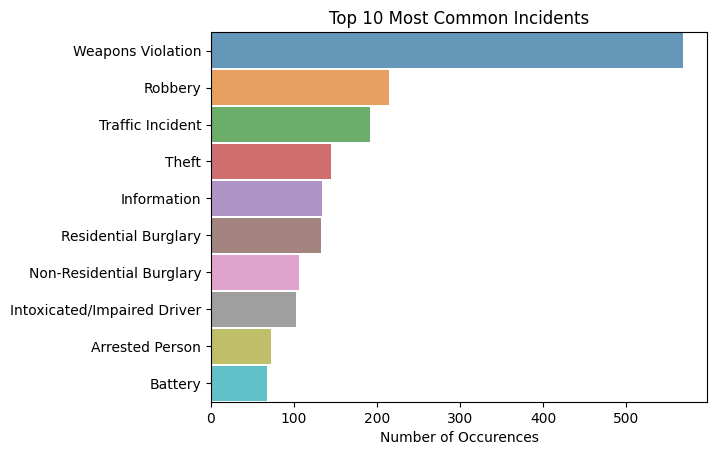

In [8]:
# Plotting Top 10 Most Common Incidents
incident_counts = df["incident"].value_counts()[:10] 
fig, ax = plt.subplots()
sns.barplot(y=incident_counts.index, x=incident_counts.values, 
            width=0.95, alpha=0.75, orient="h", ax=ax)
plt.title("Top 10 Most Common Incidents")
plt.xlabel("Number of Occurences")

In [ ]:
df["officer_type"].unique()

# addr_test["coords"] = addr_results["geometry"]
# addr_test
#sum(addr_results["address"].isna()) #9 

plotting = addr_test[addr_test["coords"].notna()]

geoplot = gpd.GeoDataFrame(plotting)
geoplot = geoplot.set_geometry("coords")

#plotting.plot()

madison_shape = gpd.read_file("City_Limit.shp")

ax = madison_shape.plot(color="grey")
geoplot.plot(column = "coords", ax=ax, color="c")